<a href="https://colab.research.google.com/github/newb-dev-1008/GetBoarded_Latitude/blob/ipython/Yash's_Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
cleaned_data = pd.read_csv('cleaned_data.csv')
countries = cleaned_data['Country/Region'].unique()
cleaned_data.describe()

,Unnamed: 0,SNo,Confirmed,Deaths,Recovered,Latitude,Longitude
count,13036.000000,13036.000000,13036.000000,13036.000000,13036.000000,13036.000000,13036.000000
mean,6598.736882,6599.736882,1562.733200,74.491102,393.138386,29.809312,14.549803
std,3817.924011,3817.924011,8905.875965,674.241100,3491.680791,20.995863,82.464076
min,0.000000,1.000000,0.000000,0.000000,0.000000,-40.900557,-106.346771
25%,3285.750000,3286.750000,5.000000,0.000000,0.000000,21.521757,-85.207229
50%,6601.500000,6602.500000,53.000000,0.000000,1.000000,35.861660,18.643501
75%,9906.250000,9907.250000,346.250000,3.000000,25.000000,37.090240,104.195397
max,13208.000000,13209.000000,151061.000000,17669.000000,64142.000000,71.706936,179.414413


In [0]:
countries = cleaned_data['Country/Region'].unique()

In [20]:
cleaned_data = cleaned_data.set_index('Country/Region')
cleaned_data.head()

,Unnamed: 0,SNo,ObservationDate,Province/State,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
Country/Region,,,,,,,,,,
China,0,1,01/22/2020,Anhui,1/22/2020 17:00,1.0,0.0,0.0,35.86166,104.195397
China,1,2,01/22/2020,Beijing,1/22/2020 17:00,14.0,0.0,0.0,35.86166,104.195397
China,2,3,01/22/2020,Chongqing,1/22/2020 17:00,6.0,0.0,0.0,35.86166,104.195397
China,3,4,01/22/2020,Fujian,1/22/2020 17:00,1.0,0.0,0.0,35.86166,104.195397
China,4,5,01/22/2020,Gansu,1/22/2020 17:00,0.0,0.0,0.0,35.86166,104.195397


In [24]:
#Creating a DataFrame for listing confirmed cases against countries

country_cases = {}

for i in countries:
  cases =  np.sum(cleaned_data.loc[[i],['Confirmed']])
  country_cases[i] = cases

country_cases_df = pd.DataFrame(country_cases)
country_cases_df = country_cases_df.transpose()
country_cases_df.head()

,Confirmed
China,4829567.0
Hong Kong,16599.0
Macau,1230.0
Taiwan,7407.0
United States,3657903.0


In [34]:
#Obtain a list of all affected countries

affected_countries = []
for i in range(8):
  country = country_cases_df[['Confirmed']].idxmax()['Confirmed']
  affected_countries.append(country)
  country_cases_df = country_cases_df.drop([country], axis = 0)

print(affected_countries)

['China', 'United States', 'Italy', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom']


In [0]:
cleaned_data['ObservationDate'] =  pd.to_datetime(cleaned_data['ObservationDate'],
                              format='%m/%d/%Y')

In [100]:
dates = cleaned_data.groupby(['ObservationDate', 'Country/Region']).sum()
dates.head(10)

Unnamed: 0  SNo  ...     Latitude    Longitude
ObservationDate Country/Region                   ...                          
2020-01-22      China                  504  535  ...  1111.711460  3230.057307
                Hong Kong               12   13  ...    22.396428   114.109497
                Japan                   35   36  ...    36.204824   138.252924
                Macau                   20   21  ...    22.198745   113.543873
                South Korea             37   38  ...    35.907757   127.766922
                Taiwan                  28   29  ...    23.697810   120.960515
                Thailand                36   37  ...    15.870032   100.992541
                United States           31   32  ...    37.090240   -95.712891
2020-01-23      Australia               80   81  ...   -25.274398   133.775136
                Brazil                  82   83  ...   -14.235004   -51.925280

[10 rows x 7 columns]

In [134]:
'''cases = []
for j in dates_array:
  case = dates[j, affected_countries[i]]['Confirmed']
  cases.append(case)

for i in range(1):
  cases = []
  for j in dates_array:
    case = dates[j, affected_countries[i]]['Confirmed']
    cases.append(case)
  plt.figure(1, figsize = [20,10])
  plt.title('Trends observed in top 4 most affected countries')
  plt.xlabel('Observation Dates')
  plt.ylabel('Cases per day')
  plt.plot(dates_array, cases, label = affected_countries[i])
plt.legend()
plt.grid()'''

"cases = []\nfor j in dates_array:\n  case = dates[j, affected_countries[i]]['Confirmed']\n  cases.append(case)\n\nfor i in range(1):\n  cases = []\n  for j in dates_array:\n    case = dates[j, affected_countries[i]]['Confirmed']\n    cases.append(case)\n  plt.figure(1, figsize = [20,10])\n  plt.title('Trends observed in top 4 most affected countries')\n  plt.xlabel('Observation Dates')\n  plt.ylabel('Cases per day')\n  plt.plot(dates_array, cases, label = affected_countries[i])\nplt.legend()\nplt.grid()"

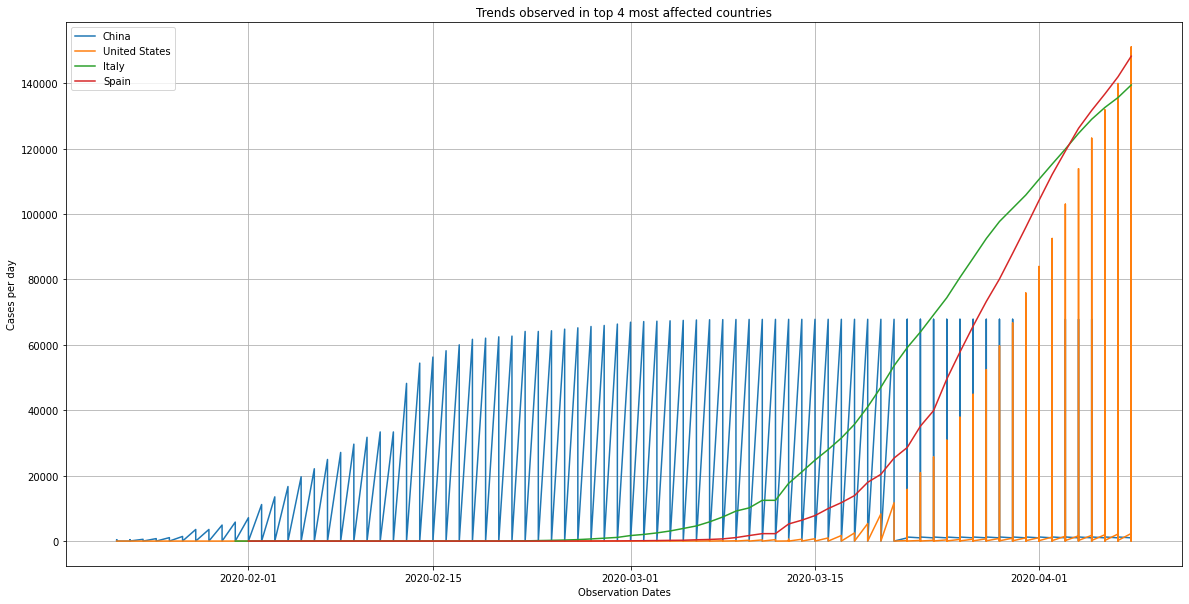

In [135]:
#Plot to visualise rise in cases over time in the worst and least affected countries

for i in range(4):
  plt.figure(1, figsize = [20,10])
  plt.title('Trends observed in top 4 most affected countries')
  plt.xlabel('Observation Dates')
  plt.ylabel('Cases per day')
  plt.plot(cleaned_data.loc[[affected_countries[i]], ['ObservationDate']].values, cleaned_data.loc[[affected_countries[i]],['Confirmed']].values, label = affected_countries[i])
plt.legend()
plt.grid()

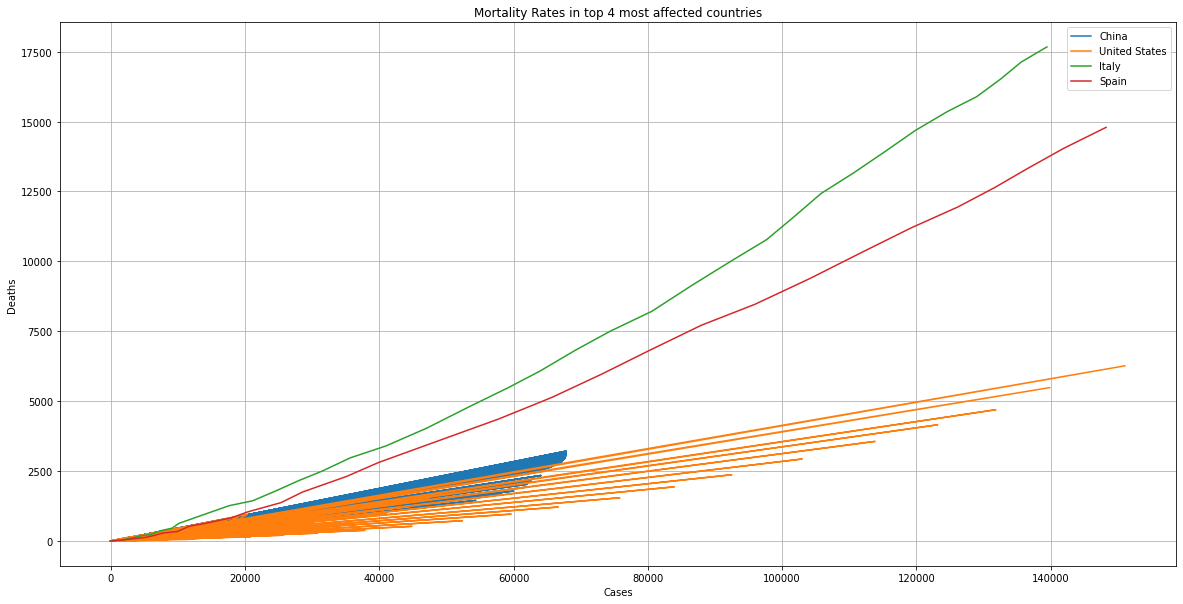

In [137]:
#Plot to visualise the mortality rates between countries by comparing cases and deaths as seperate axes and plotting first k countries

for i in range(4):
  plt.figure(1, figsize = [20,10])
  plt.title('Mortality Rates in top 4 most affected countries')
  plt.xlabel('Cases')
  plt.ylabel('Deaths')
  plt.plot(cleaned_data.loc[[affected_countries[i]], ['Confirmed']].values, cleaned_data.loc[[affected_countries[i]],['Deaths']].values, label = affected_countries[i])
plt.legend()
plt.grid()

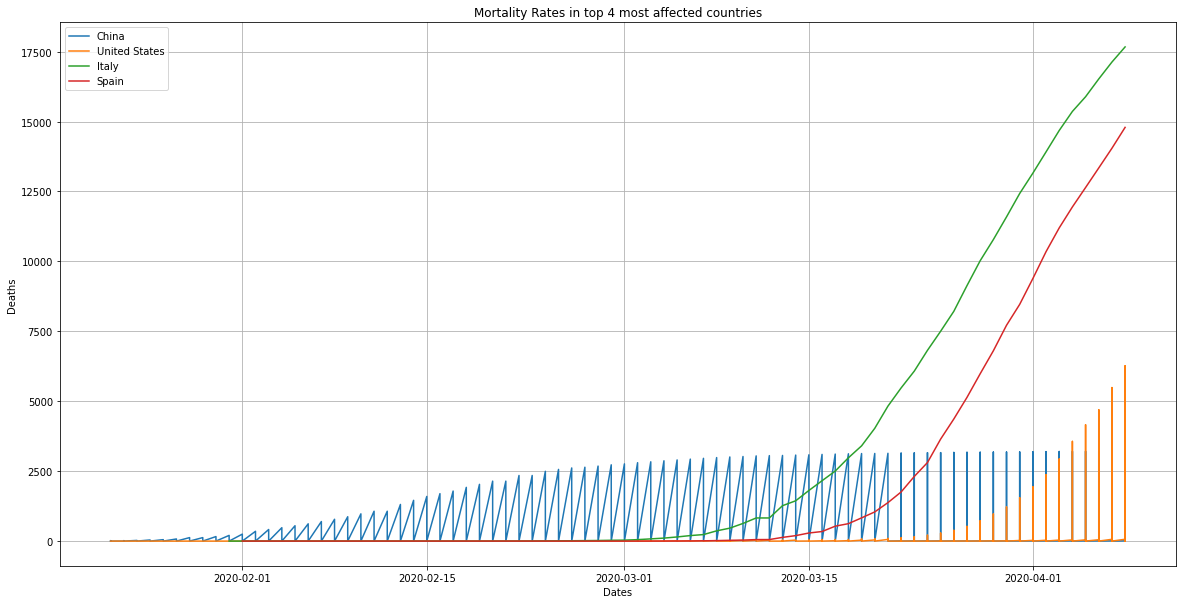

In [138]:
#Plot to visualise the mortality rates between countries by comparing dates and deaths as seperate axes and plotting first k countries

for i in range(4):
  plt.figure(1, figsize = [20,10])
  plt.title('Mortality Rates in top 4 most affected countries')
  plt.xlabel('Dates')
  plt.ylabel('Deaths')
  plt.plot(cleaned_data.loc[[affected_countries[i]], ['ObservationDate']].values, cleaned_data.loc[[affected_countries[i]],['Deaths']].values, label = affected_countries[i])
plt.legend()
plt.grid()

In [0]:
#Plot to compare confirmed to recovered cases for countries

In [0]:
#Scatter plot between latitude and number of cases